# Info
Name:  

    ORACLES_routine_4STAR

Purpose:  

    Compare the routine flights AOD from 4STAR as compared to climatology
  
Input:

    none

Output:
   
    plots
  
Keywords:

    none
  
Dependencies:

    - numpy
    - matplotlib
    - scipy

  
Needed Files:

  - ...
    
History:

    Written: Samuel LeBlanc,Santa Cruz, CA, 2016-11-08
    

# Prepare the python environment


In [128]:
import numpy as np
import scipy.io as sio
import os
import matplotlib.pyplot as plt

In [129]:
%matplotlib notebook

In [130]:
from load_utils import mat2py_time, toutc, load_ict
from Sp_parameters import smooth

import hdf5storage as hs

from path_utils import getpath

In [131]:
fp = getpath('ORACLES')
fp

u'/mnt/c/Users/sleblanc/Research/ORACLES/'

In [132]:
vv = 'R2'

# Load files

## 4STAR ict

In [133]:
s = hs.loadmat(fp+'/aod_ict/{vv}/all_aod_ict_{vv}.mat'.format(vv=vv))

In [134]:
s.keys()

[u'AOD1040',
 u'AOD0532',
 u'AOD0530',
 u'UNCAOD0550',
 u'UNCAOD0700',
 u'AOD0470',
 u'AOD1627',
 u'AOD0520',
 u'UNCAOD0620',
 u'AOD0606',
 u'AOD1064',
 u'Latitude',
 u'UNCAOD0452',
 u'fl_alt_6',
 u'AOD0620',
 u'AOD0700',
 u'AOD0550',
 u'AOD0660',
 u'AOD0452',
 u'AOD0355',
 u'fl1',
 u'UNCAOD1236',
 u'fl2',
 u'UNCAOD1064',
 u'UNCAOD0501',
 u'UNCAOD0606',
 u'UNCAOD0355',
 u'qual_flag',
 u'UNCAOD0675',
 u'AOD1559',
 u'UNCAOD1650',
 u'UNCAOD1559',
 u'UNCAOD1250',
 u'AOD0501',
 u'Longitude',
 u'UNCAOD0660',
 u'GPS_Alt',
 u'AOD1250',
 u'UNCAOD0380',
 u'fl',
 u'AOD0675',
 u'fl_QA',
 u'AOD1236',
 u'AOD1650',
 u'UNCAOD0470',
 u'AOD0380',
 u'UNCAOD0865',
 u'idays',
 u'Start_UTC',
 u'UNCAOD0781',
 u'days',
 u'UNCAOD0520',
 u'AOD0781',
 u'fl_alt_18',
 u'fl_alt',
 u'AOD0865',
 u'amass_aer',
 u'UNCAOD1627',
 u'UNCAOD1020',
 u'UNCAOD0532',
 u'UNCAOD1040',
 u'UNCAOD0530',
 u'AOD1020']

## MODIS climatology

In [135]:
fp

u'/mnt/c/Users/sleblanc/Research/ORACLES/'

From Rob Wood, email on 2016-11-08, 15:35, 
These are just the all-years means (the black lines), for the month of September (DOY 244 to 273)

In [14]:
m = sio.netcdf_file(fp+'data_other/climatology/mombl_oracles_routine_flight_NW-SE.nc')

In [15]:
m.variables

OrderedDict([('NAME', <scipy.io.netcdf.netcdf_variable at 0x7f2bd5931910>),
             ('LONGITUDE',
              <scipy.io.netcdf.netcdf_variable at 0x7f2bd5931c50>),
             ('AOD_CLIMOMEAN',
              <scipy.io.netcdf.netcdf_variable at 0x7f2bd5931c90>),
             ('AODFM_CLIMOMEAN',
              <scipy.io.netcdf.netcdf_variable at 0x7f2bd5931ed0>),
             ('RE_CLIMOMEAN',
              <scipy.io.netcdf.netcdf_variable at 0x7f2bd5931f50>),
             ('ND_CLIMOMEAN',
              <scipy.io.netcdf.netcdf_variable at 0x7f2bd5931fd0>),
             ('TTOP_CLIMOMEAN',
              <scipy.io.netcdf.netcdf_variable at 0x7f2bd5931990>),
             ('LWP_CLIMOMEAN',
              <scipy.io.netcdf.netcdf_variable at 0x7f2bd5931e10>),
             ('CFTOTAL_CLIMOMEAN',
              <scipy.io.netcdf.netcdf_variable at 0x7f2bd5931f90>),
             ('CFWATER_CLIMOMEAN',
              <scipy.io.netcdf.netcdf_variable at 0x7f2bd5931f10>)])

In [16]:
m2 = sio.netcdf_file(fp+'data_other/climatology/mombl_oracles_routine_flight_NW-SE_all.nc')

In [17]:
m2.variables

OrderedDict([('NAME', <scipy.io.netcdf.netcdf_variable at 0x7f2bd5943910>),
             ('LONGITUDE',
              <scipy.io.netcdf.netcdf_variable at 0x7f2bd586ca90>),
             ('AOD_CLIMOMEAN',
              <scipy.io.netcdf.netcdf_variable at 0x7f2bbc701490>),
             ('AODFM_CLIMOMEAN',
              <scipy.io.netcdf.netcdf_variable at 0x7f2bd585f810>),
             ('RE_CLIMOMEAN',
              <scipy.io.netcdf.netcdf_variable at 0x7f2bd586cd90>),
             ('ND_CLIMOMEAN',
              <scipy.io.netcdf.netcdf_variable at 0x7f2bd586cb90>),
             ('TTOP_CLIMOMEAN',
              <scipy.io.netcdf.netcdf_variable at 0x7f2bd586cc90>),
             ('LWP_CLIMOMEAN',
              <scipy.io.netcdf.netcdf_variable at 0x7f2bd586cb10>),
             ('CFTOTAL_CLIMOMEAN',
              <scipy.io.netcdf.netcdf_variable at 0x7f2bd586cd10>),
             ('CFWATER_CLIMOMEAN',
              <scipy.io.netcdf.netcdf_variable at 0x7f2bd586ccd0>),
             ('AOD_YRMEAN',


In [18]:
m2.variables['AOD_YRMEAN'].data.shape

(1, 15, 13)

In [19]:
m2.variables['AOD_YRMEAN'].data

array([[[  4.45985824e-01,   3.16387504e-01,   4.47000027e-01,
           8.71484339e-01,   6.73612475e-01,   5.81343710e-01,
           6.06093705e-01,   7.24328101e-01,   4.81757790e-01,
           6.65496051e-01,   5.68125010e-01,   6.30671918e-01,
           4.47281301e-01],
        [  6.00991130e-01,   2.33999997e-01,   4.49828148e-01,
           5.96606255e-01,   9.68437493e-01,   4.23656255e-01,
           7.11187482e-01,   8.00290227e-01,   4.74393755e-01,
           7.59496868e-01,   6.33599997e-01,   6.27206206e-01,
           4.79400009e-01],
        [  6.49343789e-01,   3.15412521e-01,   4.47806269e-01,
           6.34007812e-01,   8.89218628e-01,   3.55612516e-01,
           1.10685265e+00,   7.81138361e-01,   5.31000018e-01,
           7.60229230e-01,   1.00565624e+00,   6.71687543e-01,
           8.14992189e-01],
        [  5.48212469e-01,   3.54000002e-01,   3.95793736e-01,
           7.72031248e-01,   7.11503863e-01,   4.88006204e-01,
           6.20156229e-01,   9.885

## MODIS AAC from Meyer for each day, subset by Meloe

Collocation method:
1.     routine flight track is made of 100 points  (i.e. straight line from 23ºS, 13ºE to 10ºS, 0ºE)
2.     I select the closest MODIS AAC data point (within 15km) to each of the N=100 pt on the routine flight track.
3.     MODIS AAC AODs are then averaged in each of Sam's longitude bins


Here’s a short description of the dataset (Kerry, please correct me if I’m wrong):
Combination of MODIS and TERRA AAC AOD, high-resolution 0.1 x 0.1º. Suggested quality filtering is applied. Parameter is "Above_Cloud_AOT_MOD04Abs" i.e retrievals assuming the MOD04 absorbing aerosol model rather than the Haywood/SAFARI-2000 model, which is what is used to create the near-real time retrieval imagery in the field for ORACLES.

In [21]:
import datetime
import load_utils as lu

In [22]:
aac = sio.loadmat(fp+'data_other/MODIS_AAC/MODIS_AAC_per_bin_all_flights_20160801_20161031.mat')

In [23]:
aac['data_aac'][0,0].dtype.names

('Nperbin',
 'medianAODperbin',
 'meanAODperbin',
 'stdevAODperbin',
 'BinCenter',
 'Binlimits',
 'FlightDay')

In [24]:
daac = []

In [25]:
for i in xrange(len(aac['data_aac'][0,:])):
    print aac['data_aac'][0,i]['FlightDay'][0][0][0]
    daac.append(lu.recarray_to_dict(aac['data_aac'][0,i]))

A2016214
A2016215
A2016216
A2016217
A2016218
A2016219
A2016220
A2016221
A2016222
A2016223
A2016224
A2016225
A2016226
A2016227
A2016228
A2016229
A2016230
A2016231
A2016232
A2016233
A2016234
A2016235
A2016236
A2016237
A2016238
A2016239
A2016240
A2016241
A2016242
A2016243
A2016244
A2016245
A2016246
A2016247
A2016248
A2016249
A2016250
A2016251
A2016252
A2016253
A2016254
A2016255
A2016256
A2016257
A2016258
A2016259
A2016260
A2016261
A2016262
A2016263
A2016264
A2016265
A2016266
A2016267
A2016268
A2016269
A2016270
A2016271
A2016272
A2016273
A2016274
A2016275
A2016276
A2016277
A2016278
A2016279
A2016280
A2016281
A2016282
A2016283
A2016284
A2016285
A2016286
A2016287
A2016288
A2016289
A2016290
A2016291
A2016292
A2016293
A2016294
A2016295
A2016296
A2016297
A2016298
A2016299
A2016300
A2016301
A2016302
A2016303
A2016304
A2016305


In [26]:
# simplify the dict
for i in xrange(len(daac)):
    for k in daac[i].keys():
        daac[i][k] = daac[i][k][0,0]

In [27]:
for i in xrange(len(daac)):
    daac[i]['datetime'] = datetime.datetime.strptime(daac[i]['FlightDay'][0], 'A%Y%j')
    daac[i]['date'] = daac[i]['datetime'].strftime('%Y%m%d')
    print i,daac[i]['date'], aac['data_aac'][0,i]['FlightDay'][0][0][0]

0 20160801 A2016214
1 20160802 A2016215
2 20160803 A2016216
3 20160804 A2016217
4 20160805 A2016218
5 20160806 A2016219
6 20160807 A2016220
7 20160808 A2016221
8 20160809 A2016222
9 20160810 A2016223
10 20160811 A2016224
11 20160812 A2016225
12 20160813 A2016226
13 20160814 A2016227
14 20160815 A2016228
15 20160816 A2016229
16 20160817 A2016230
17 20160818 A2016231
18 20160819 A2016232
19 20160820 A2016233
20 20160821 A2016234
21 20160822 A2016235
22 20160823 A2016236
23 20160824 A2016237
24 20160825 A2016238
25 20160826 A2016239
26 20160827 A2016240
27 20160828 A2016241
28 20160829 A2016242
29 20160830 A2016243
30 20160831 A2016244
31 20160901 A2016245
32 20160902 A2016246
33 20160903 A2016247
34 20160904 A2016248
35 20160905 A2016249
36 20160906 A2016250
37 20160907 A2016251
38 20160908 A2016252
39 20160909 A2016253
40 20160910 A2016254
41 20160911 A2016255
42 20160912 A2016256
43 20160913 A2016257
44 20160914 A2016258
45 20160915 A2016259
46 20160916 A2016260
47 20160917 A2016261
48

In [28]:
len(daac)

92

In [29]:
i_aug = range(0,31)
i_sep = range(31,61)
i_oct = range(61,92)
i_flt = [30,34,38,40,42,55]

days in the binned for flights only

 - 0 20160831 A2016244
 - 1 20160904 A2016248
 - 2 20160908 A2016252
 - 3 20160910 A2016254
 - 4 20160912 A2016256
 - 5 20160925 A2016269

# Subset for routine flight

In [136]:
d_rtn = ['20160831','20160904','20160908','20160910','20160912','20160925']

In [139]:
d_rtnf = [20160831.0,20160904.0,20160908.0,20160910.0,20160912.0,20160925.0]

In [137]:
d_irtn = [2.0,4.0,6.0,7.0,8.0,13.0]

In [140]:
s['days'][0]

20160824.0

In [143]:
ff

[array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool)]

In [142]:
ff = []
for d in d_rtnf:
    ff.append(s['days']==d)

In [160]:
fl = ((s['days']==d_rtnf[0]) | (s['days']==d_rtnf[1]) | (s['days']==d_rtnf[2]) | 
      (s['days']==d_rtnf[3]) | (s['days']==d_rtnf[4]) | (s['days']==d_rtnf[5]))

In [159]:
s['fl_rtn'] = fl & s['fl']

In [163]:
s['fl_rtn']

array([False, False, False, ..., False, False, False], dtype=bool)

# Now plot the routine flight aods

## all points

<IPython.core.display.Javascript object>


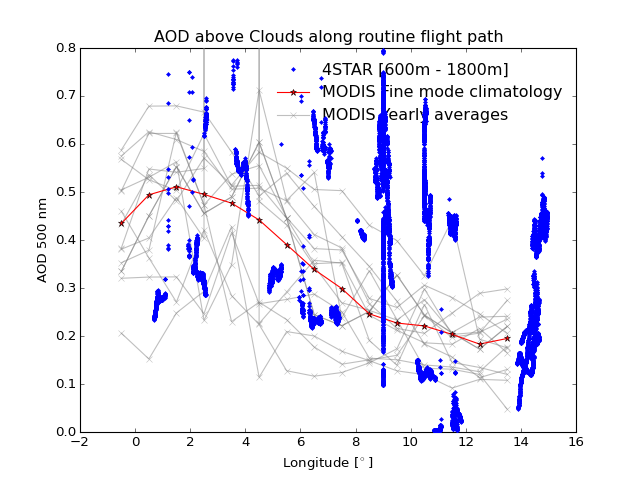

In [61]:
plt.figure()
plt.plot(s['Longitude'][s['fl_rtn']],s['AOD0501'][s['fl_rtn']],'.',label='4STAR [600m - 1800m]',zorder=100)
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.5,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.5,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.legend(numpoints=1,frameon=False)
plt.title('AOD above Clouds along routine flight path')
plt.savefig(fp+'plot/Climat_AAC_4STAR_all_MODIS.png',transparent=True,dpi=600)

## heat map of points

<IPython.core.display.Javascript object>


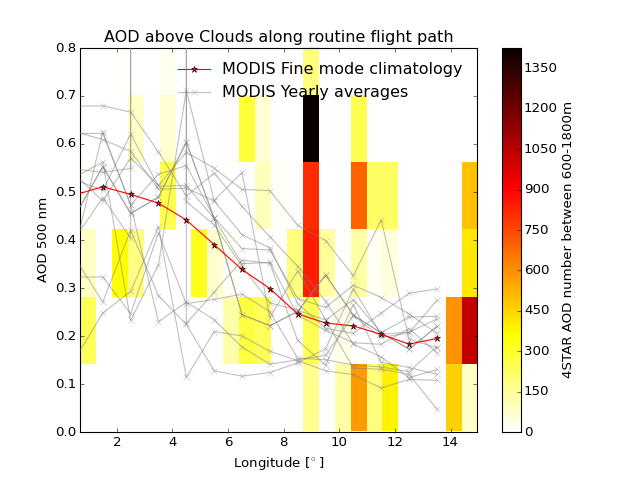

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [65]:
plt.figure()
cc = plt.hist2d(s['Longitude'][s['fl_rtn']],s['AOD0501'][s['fl_rtn']],bins=25,cmap=plt.cm.hot_r)
cb = plt.colorbar()
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.5,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.5,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.legend(numpoints=1,frameon=False)
plt.title('AOD above Clouds along routine flight path')
cb.set_label('4STAR AOD number between 600-1800m')
plt.savefig(fp+'plot\\Climat_AAC_4STAR_hist_MODIS.png',transparent=True,dpi=600)

## Use bins from heat map to make box whisker plot

In [36]:
bins = []
pos = []
for i,c in enumerate(cc[1][0:-2]):
    lon_fl = (s['Longitude'][s['fl_rtn']]>=c)&(s['Longitude'][s['fl_rtn']]<cc[1][i+1])
    bins.append(s['AOD0501'][s['fl_rtn']][lon_fl])
    pos.append((c+cc[1][i+1])/2.0)

NameError: name 'cc' is not defined

In [37]:
def color_box(bp, color):

    # Define the elements to color. You can also add medians, fliers and means
    elements = ['boxes','caps','whiskers','medians','means','fliers']

    # Iterate over each of the elements changing the color
    for elem in elements:
        [plt.setp(bp[elem][idx], color=color) for idx in xrange(len(bp[elem]))]
    return

<IPython.core.display.Javascript object>


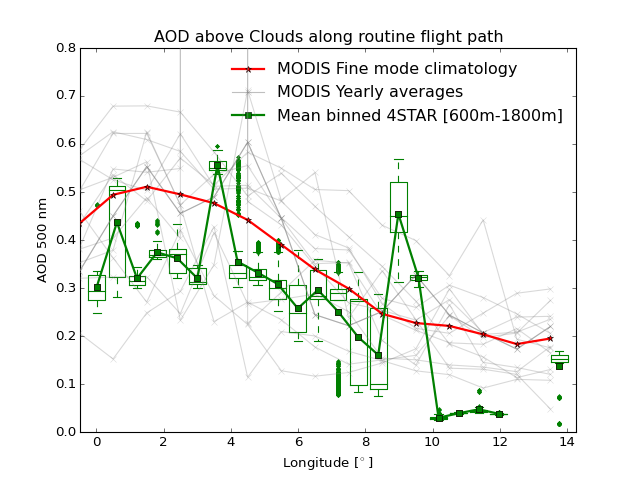

In [151]:
plt.figure()
#plt.plot(s['Longitude'][s['fl_rtn']],s['AOD0501'][s['fl_rtn']],'.',label='4STAR [600m - 1800m]',
#         zorder=60,alpha=0.02,color='green')
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.5,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.3,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above Clouds along routine flight path')
bo = plt.boxplot(bins,0,'g.',showmeans=True,positions=pos)
color_box(bo,'green')
#[plt.setp(bo['fliers'][idx],alpha=0.5,)for idx in xrange(len(bo['fliers']))]
plt.plot(pos,[a.get_ydata()[0] for a in bo['means']],'s-',zorder=100,color='green',label='Mean binned 4STAR [600m-1800m]',lw=2)
plt.legend(numpoints=1,frameon=False)
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
plt.savefig(fp+'plot\\Climat_AAC_4STAR_box_MODIS.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


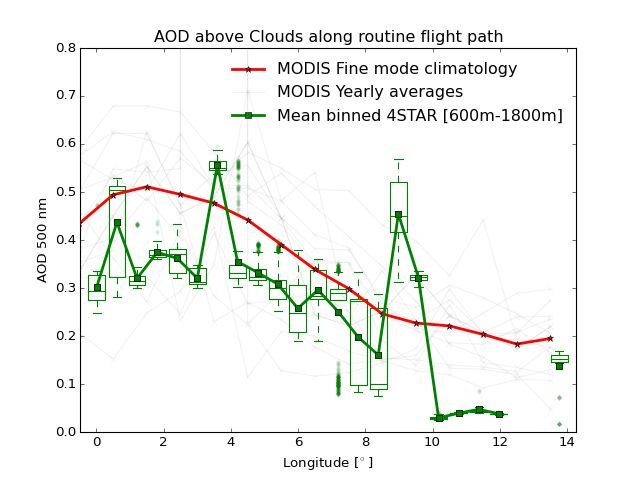

In [156]:
plt.figure()
#plt.plot(s['Longitude'][s['fl_rtn']],s['AOD0501'][s['fl_rtn']],'.',label='4STAR [600m - 1800m]',
#         zorder=60,alpha=0.02,color='green')
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above Clouds along routine flight path')
bo = plt.boxplot(bins,0,'g.',showmeans=True,positions=pos)
color_box(bo,'green')
[plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
plt.plot(pos,[a.get_ydata()[0] for a in bo['means']],'s-',zorder=100,color='green',label='Mean binned 4STAR [600m-1800m]',lw=2.5)
plt.legend(numpoints=1,frameon=False)
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
plt.savefig(fp+'plot\\Climat_AAC_4STAR_box_simpler_MODIS.png',transparent=True,dpi=600)

## Make another binning product, with less bins

<IPython.core.display.Javascript object>


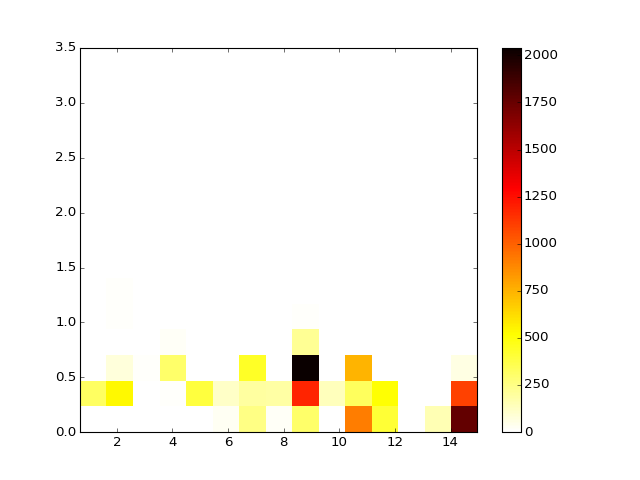

In [67]:
plt.figure()
cc2 = plt.hist2d(s['Longitude'][s['fl_rtn']],s['AOD0501'][s['fl_rtn']],bins=15,cmap=plt.cm.hot_r)
cb = plt.colorbar()

In [38]:
bins2 = []
pos2 = []
for i,c in enumerate(cc2[1][0:-2]):
    lon_fl = (s['Longitude'][s['fl_rtn']]>=c)&(s['Longitude'][s['fl_rtn']]<cc2[1][i+1])
    bins2.append(s['AOD0501'][s['fl_rtn']][lon_fl])
    pos2.append((c+cc2[1][i+1])/2.0)

NameError: name 'cc2' is not defined

<IPython.core.display.Javascript object>


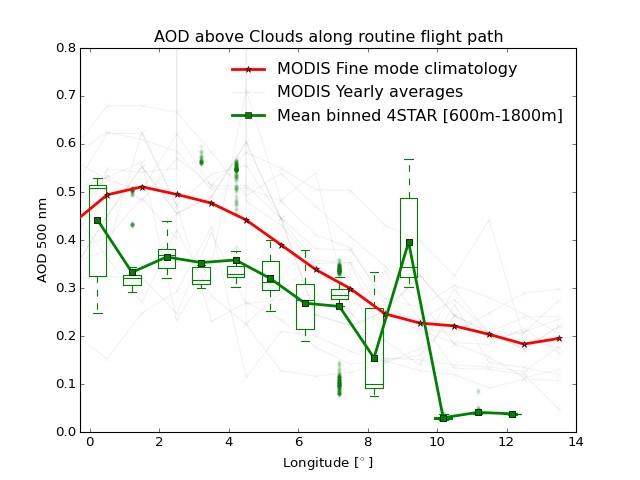

In [162]:
plt.figure()
#plt.plot(s['Longitude'][s['fl_rtn']],s['AOD0501'][s['fl_rtn']],'.',label='4STAR [600m - 1800m]',
#         zorder=60,alpha=0.02,color='green')
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above Clouds along routine flight path')
bo = plt.boxplot(bins2,0,'g.',showmeans=True,positions=pos2)
color_box(bo,'green')
[plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
plt.plot(pos2,[a.get_ydata()[0] for a in bo['means']],'s-',zorder=100,color='green',label='Mean binned 4STAR [600m-1800m]',lw=2.5)
plt.legend(numpoints=1,frameon=False)
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
plt.savefig(fp+'plot\\Climat_AAC_4STAR_box2_simpler_MODIS.png',transparent=True,dpi=600)

## Now try with same bins as MODIS

In [39]:
pos3 = m.variables['LONGITUDE'].data[0,:]

In [40]:
pos3

array([ -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,
         8.5,   9.5,  10.5,  11.5,  12.5,  13.5], dtype=float32)

In [41]:
lims3 = pos3-0.5
lims3= np.append(lims3,pos3[-1]+0.5)

In [42]:
lims3

array([ -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,
        10.,  11.,  12.,  13.,  14.])

In [43]:
bins3 = []
for i,c in enumerate(lims3[0:-1]):
    lon_fl = (s['Longitude'][s['fl_rtn']]>=c)&(s['Longitude'][s['fl_rtn']]<lims3[i+1])
    bins3.append(s['AOD0501'][s['fl_rtn']][lon_fl])

In [44]:
len(lims3)

16

In [45]:
len(bins3)

15

In [46]:
len(pos3)

15

<IPython.core.display.Javascript object>


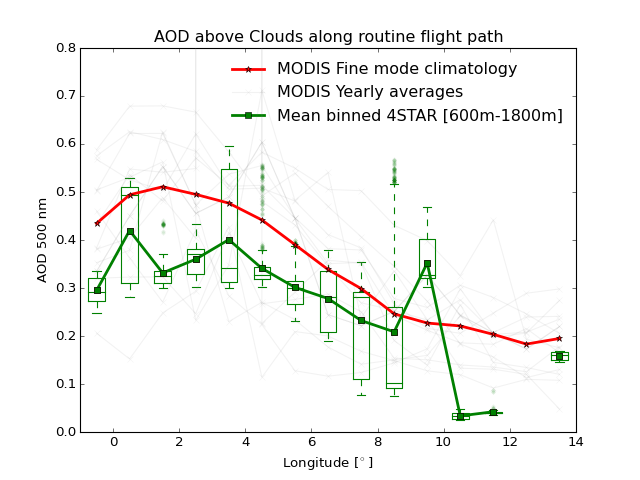

In [190]:
plt.figure()
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above Clouds along routine flight path')
bo = plt.boxplot(bins3,0,'g.',showmeans=True,positions=pos3)
color_box(bo,'green')
[plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
plt.plot(pos3,[a.get_ydata()[0] for a in bo['means']],'s-',zorder=100,color='green',label='Mean binned 4STAR [600m-1800m]',lw=2.5)
plt.legend(numpoints=1,frameon=False)
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
plt.savefig(fp+'plot\\Climat_AAC_4STAR_box3_simpler_MODIS.png',transparent=True,dpi=600)

In [149]:
s['fl_alt12'] = (s['GPS_Alt']>=600)&(s['GPS_Alt']<1200)
s['fl_alt16'] = (s['GPS_Alt']>=500)&(s['GPS_Alt']<1600)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


In [150]:
s['fl_alt12']

array([False, False, False, ..., False, False, False], dtype=bool)

In [151]:
s['fl_rtn_12'] = s['fl_alt12'] & s['fl_QA'] & s['fl_rtn']
s['fl_rtn_16'] = s['fl_alt16'] & s['fl_QA'] & s['fl_rtn']


In [152]:
s['fl_rtn_12']

array([False, False, False, ..., False, False, False], dtype=bool)

In [153]:
bins3_12 = []
for i,c in enumerate(lims3[0:-1]):
    lon_fl = (s['Longitude'][s['fl_rtn_12']]>=c)&(s['Longitude'][s['fl_rtn_12']]<lims3[i+1])
    bins3_12.append(s['AOD0501'][s['fl_rtn_12']][lon_fl])

<IPython.core.display.Javascript object>


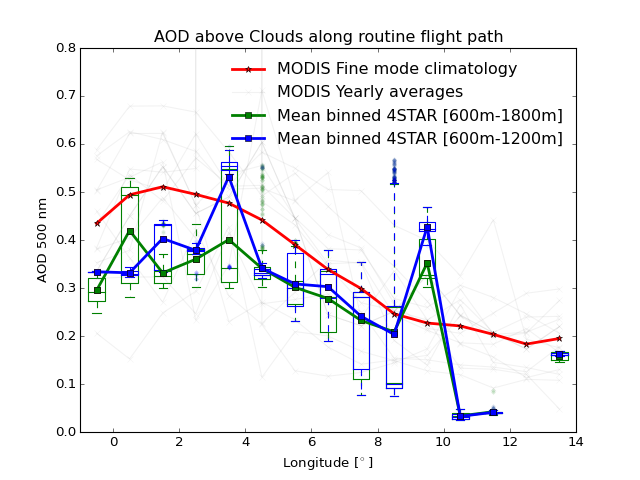

In [209]:
plt.figure()
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above Clouds along routine flight path')

bo = plt.boxplot(bins3,0,'g.',showmeans=True,positions=pos3)
color_box(bo,'green')
[plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
plt.plot(pos3,[a.get_ydata()[0] for a in bo['means']],'s-',zorder=100,color='green',label='Mean binned 4STAR [600m-1800m]',lw=2.5)

bo2 = plt.boxplot(bins3_12,0,'b.',showmeans=True,positions=pos3)
color_box(bo2,'blue')
[plt.setp(bo2['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
plt.plot(pos3,[a.get_ydata()[0] for a in bo2['means']],'s-',zorder=100,color='blue',label='Mean binned 4STAR [600m-1200m]',lw=2.5)

plt.legend(numpoints=1,frameon=False)
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
plt.savefig(fp+'plot\\Climat_AAC_4STAR_box3_simpler_2alt_MODIS.png',transparent=True,dpi=600)

## make a plot day by day

In [52]:
d_irtn = [2.0,4.0,6.0,7.0,8.0,13.0]

In [122]:
s['days']==2.0

True

In [164]:
flr2 = s['fl_rtn_16']&(s['days']==d_rtnf[0])
flr4 = s['fl_rtn_16']&(s['days']==d_rtnf[1])
flr6 = s['fl_rtn_16']&(s['days']==d_rtnf[2])
flr7 = s['fl_rtn_16']&(s['days']==d_rtnf[3])
flr8 = s['fl_rtn_16']&(s['days']==d_rtnf[4])
flr13 = s['fl_rtn_16']&(s['days']==d_rtnf[5])

In [165]:
fr2 = s['fl_rtn']&(s['days']==d_rtnf[0])
fr4 = s['fl_rtn']&(s['days']==d_rtnf[1])
fr6 = s['fl_rtn']&(s['days']==d_rtnf[2])
fr7 = s['fl_rtn']&(s['days']==d_rtnf[3])
fr8 = s['fl_rtn']&(s['days']==d_rtnf[4])
fr13 = s['fl_rtn']&(s['days']==d_rtnf[5])

In [166]:
fr = [fr2,fr4,fr6,fr7,fr8,fr13]
flr = [flr2,flr4,flr6,flr7,flr8,flr13]

In [167]:
flr2

array([False, False, False, ..., False, False, False], dtype=bool)

In [168]:
cls = ['green','blue','yellow','cyan','magenta','orange']

In [57]:
d_rtn

['20160831', '20160904', '20160908', '20160910', '20160912', '20160925']

<IPython.core.display.Javascript object>


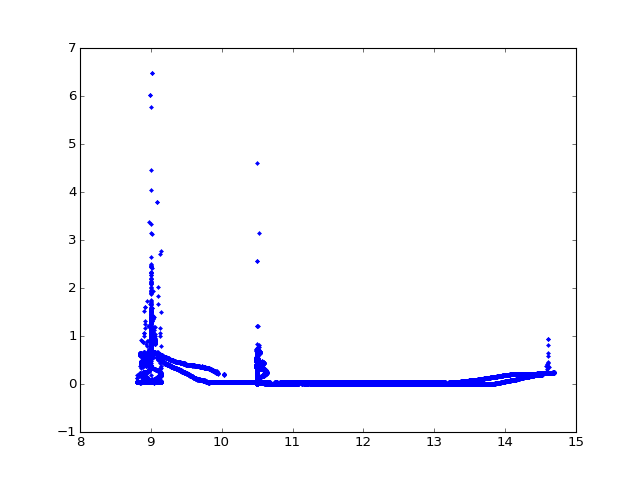

In [51]:
plt.figure()
plt.plot(s['Longitude'][f],s['AOD0501'][f],'.')

<IPython.core.display.Javascript object>


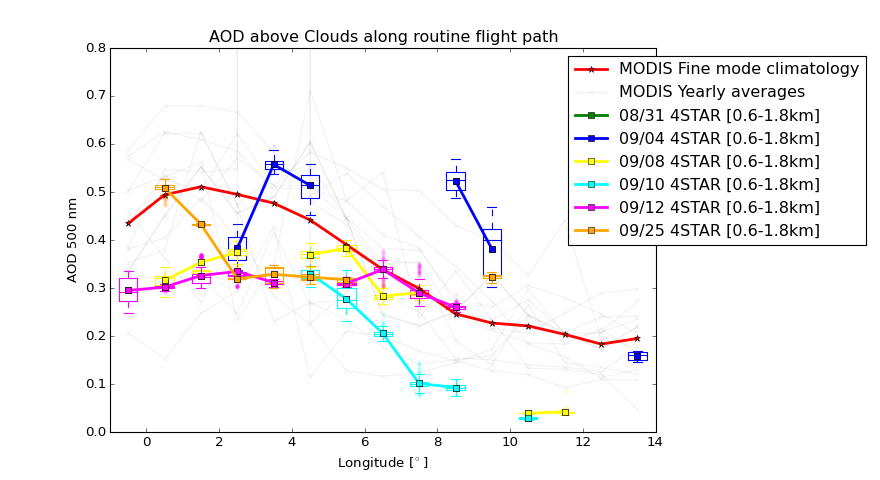

In [276]:
plt.figure(figsize=(11,6))
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above Clouds along routine flight path')

for j,f in enumerate(fr):
    binsf = []
    for i,c in enumerate(lims3[0:-1]):
        lon_fl = (s['Longitude'][f]>=c)&(s['Longitude'][f]<lims3[i+1])
        binsf.append(s['AOD0501'][f][lon_fl])
    #plt.plot(s['Longitude'][f],s['AOD0501'][f],'.',color=cls[j],alpha=0.02)
    bo = plt.boxplot(binsf,0,'.',showmeans=True,positions=pos3)
    color_box(bo,cls[j])
    [plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
    plt.plot(pos3,[a.get_ydata()[0] for a in bo['means']],
             's-',zorder=100,color=cls[j],label='{}/{} 4STAR [0.6-1.8km]'.format(d_rtn[j][4:6],d_rtn[j][6:8]),lw=2.5)

plt.legend(numpoints=1,frameon=True,bbox_to_anchor=(1.4,1.0))
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.savefig(fp+'plot\\Climat_AAC_4STAR_box3_days_MODIS.png',transparent=True,dpi=600)

## Make an average from daily averages

<IPython.core.display.Javascript object>


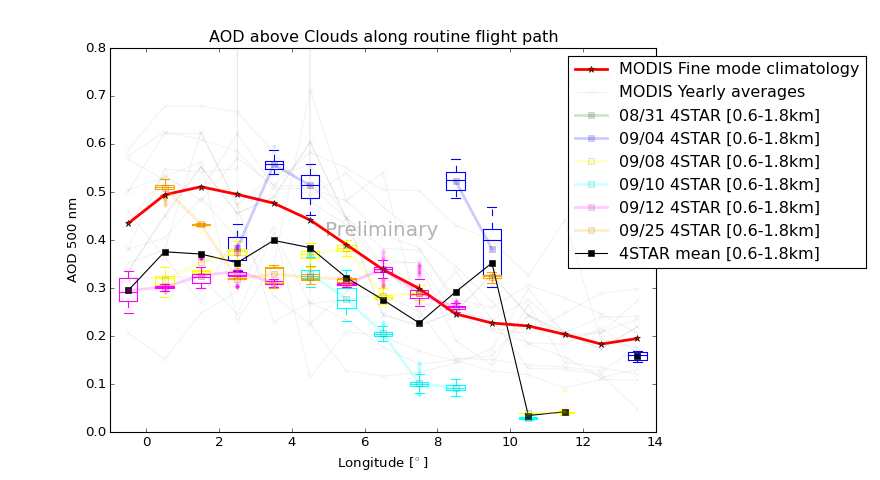

In [41]:
plt.figure(figsize=(11,6))
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above Clouds along routine flight path')
means = []

for j,f in enumerate(fr):
    binsf = []
    for i,c in enumerate(lims3[0:-1]):
        lon_fl = (s['Longitude'][f]>=c)&(s['Longitude'][f]<lims3[i+1])
        binsf.append(s['AOD0501'][f][lon_fl])
    #plt.plot(s['Longitude'][f],s['AOD0501'][f],'.',color=cls[j],alpha=0.02)
    bo = plt.boxplot(binsf,0,'.',showmeans=True,positions=pos3)
    color_box(bo,cls[j])
    [plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
    [plt.setp(bo['means'][idx],alpha=0.05)for idx in xrange(len(bo['means']))]
    means.append([a.get_ydata()[0] for a in bo['means']])
    plt.plot(pos3,[a.get_ydata()[0] for a in bo['means']],
             's-',zorder=100,color=cls[j],label='{}/{} 4STAR [0.6-1.8km]'.format(d_rtn[j][4:6],d_rtn[j][6:8]),
             lw=2.5,alpha=0.2)    
    
plt.text(0.5, 0.5, 'Preliminary',
        verticalalignment='bottom', horizontalalignment='center',
        transform=plt.gca().transAxes,
        color='k', fontsize=18,zorder=1,alpha=0.3)
plt.plot(pos3,np.nanmean(np.array(means),axis=0),'s-k',label='4STAR mean [0.6-1.8km]')
plt.legend(numpoints=1,frameon=True,bbox_to_anchor=(1.4,1.0))
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.savefig(fp+'plot\\Climat_AAC_4STAR_box3_days_avg_MODIS.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


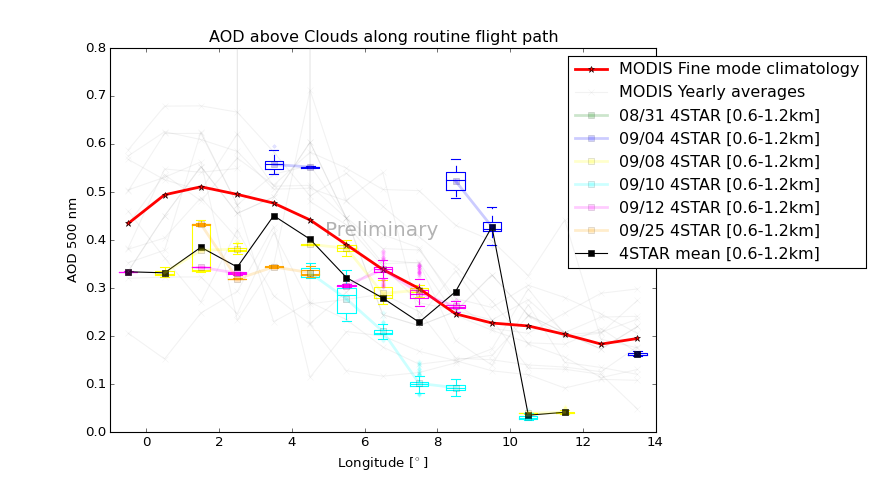

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\numpy\lib\nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [40]:
plt.figure(figsize=(11,6))
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above Clouds along routine flight path')
means = []

for j,f in enumerate(flr):
    binsf = []
    for i,c in enumerate(lims3[0:-1]):
        lon_fl = (s['Longitude'][f]>=c)&(s['Longitude'][f]<lims3[i+1])
        binsf.append(s['AOD0501'][f][lon_fl])
    #plt.plot(s['Longitude'][f],s['AOD0501'][f],'.',color=cls[j],alpha=0.02)
    bo = plt.boxplot(binsf,0,'.',showmeans=True,positions=pos3)
    color_box(bo,cls[j])
    [plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
    [plt.setp(bo['means'][idx],alpha=0.05)for idx in xrange(len(bo['means']))]
    means.append([a.get_ydata()[0] for a in bo['means']])
    plt.plot(pos3,[a.get_ydata()[0] for a in bo['means']],
             's-',zorder=100,color=cls[j],label='{}/{} 4STAR [0.6-1.2km]'.format(d_rtn[j][4:6],d_rtn[j][6:8]),
             lw=2.5,alpha=0.2)    
    
plt.plot(pos3,np.nanmean(np.array(means),axis=0),'s-k',label='4STAR mean [0.6-1.2km]')
plt.text(0.5, 0.5, 'Preliminary',
        verticalalignment='bottom', horizontalalignment='center',
        transform=plt.gca().transAxes,
        color='k', fontsize=18,zorder=1,alpha=0.3)
plt.legend(numpoints=1,frameon=True,bbox_to_anchor=(1.4,1.0))
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.savefig(fp+'plot\\Climat_AAC_4STAR_box3_days_avg_12_MODIS.png',transparent=True,dpi=600)

## Redo plots for entire column 

In [58]:
s['fl_alt_6'] = (s['GPS_Alt']<=600)
s['fl_rtn_6'] = s['fl_alt_6'] & s['fl_QA'] & fl
flrr2 = s['fl_rtn_6']&(s['days']==2.0)
flrr4 = s['fl_rtn_6']&(s['days']==4.0)
flrr6 = s['fl_rtn_6']&(s['days']==6.0)
flrr7 = s['fl_rtn_6']&(s['days']==7.0)
flrr8 = s['fl_rtn_6']&(s['days']==8.0)
flrr13 = s['fl_rtn_6']&(s['days']==13.0)
flrr = [flrr2,flrr4,flrr6,flrr7,flrr8,flrr13]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


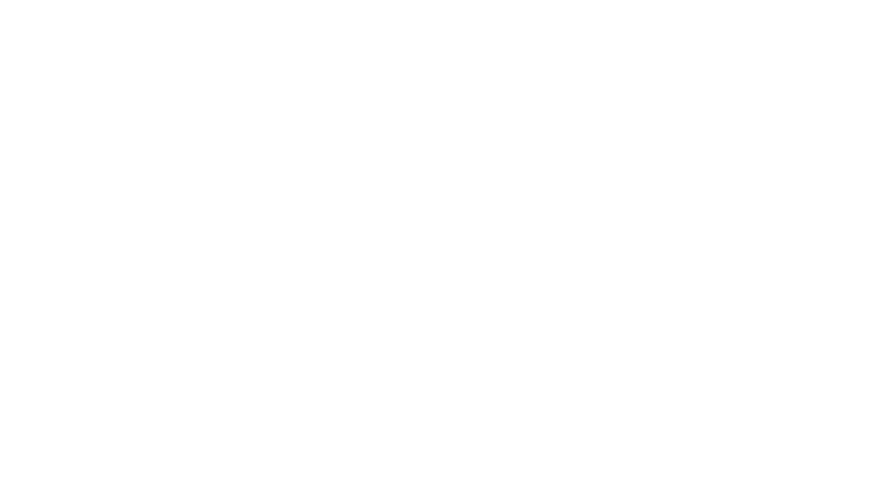

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice


IOError: [Errno 22] invalid mode ('wb') or filename: u'/mnt/c/Users/sleblanc/Research/ORACLES/plot\\Climat_AAC_4STAR_box3_days_avg_surf_MODIS.png'

In [59]:
plt.figure(figsize=(11,6))
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above Clouds along routine flight path')
means = []

for j,f in enumerate(flrr):
    binsf = []
    for i,c in enumerate(lims3[0:-1]):
        lon_fl = (s['Longitude'][f]>=c)&(s['Longitude'][f]<lims3[i+1])
        binsf.append(s['AOD0501'][f][lon_fl])
    #plt.plot(s['Longitude'][f],s['AOD0501'][f],'.',color=cls[j],alpha=0.02)
    bo = plt.boxplot(binsf,0,'.',showmeans=True,positions=pos3)
    color_box(bo,cls[j])
    [plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
    means.append([a.get_ydata()[0] for a in bo['means']])
    plt.plot(pos3,[a.get_ydata()[0] for a in bo['means']],
             's-',zorder=100,color=cls[j],label='{}/{} 4STAR [0-0.6 km]'.format(d_rtn[j][4:6],d_rtn[j][6:8]),
             lw=2.5,alpha=0.2)    
    
plt.plot(pos3,np.nanmean(np.array(means),axis=0),'s-k',label='4STAR mean [0-0.6 km]')
plt.legend(numpoints=1,frameon=True,bbox_to_anchor=(1.4,1.0))
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.savefig(fp+'plot\\Climat_AAC_4STAR_box3_days_avg_surf_MODIS.png',transparent=True,dpi=600)

## Redo plots but with the MODIS AAC

In [60]:
daac[0].keys()

['Nperbin',
 'Binlimits',
 'FlightDay',
 'BinCenter',
 'stdevAODperbin',
 'datetime',
 'meanAODperbin',
 'medianAODperbin',
 'date']

In [61]:
a['meanAODperbin']

TypeError: 'Line2D' object has no attribute '__getitem__'

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


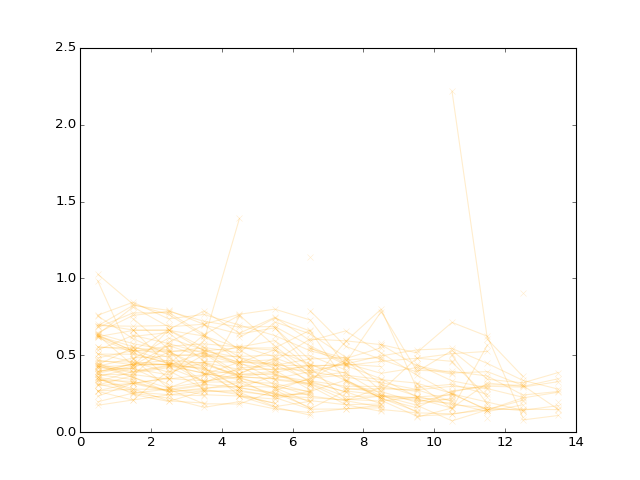

In [142]:
plt.figure()

for i,a in enumerate(daac):
   # print a['BinCenter'].shape,a['meanAODperbin'][0:-1].shape
   # print a['meanAODperbin']
    plt.plot(a['BinCenter'][0,:],a['meanAODperbin'][0:-1],'x-',lw=1,color='orange',alpha=0.2)

In [62]:
np.nanmean(ac,axis=0).shape

NameError: name 'ac' is not defined

<IPython.core.display.Javascript object>


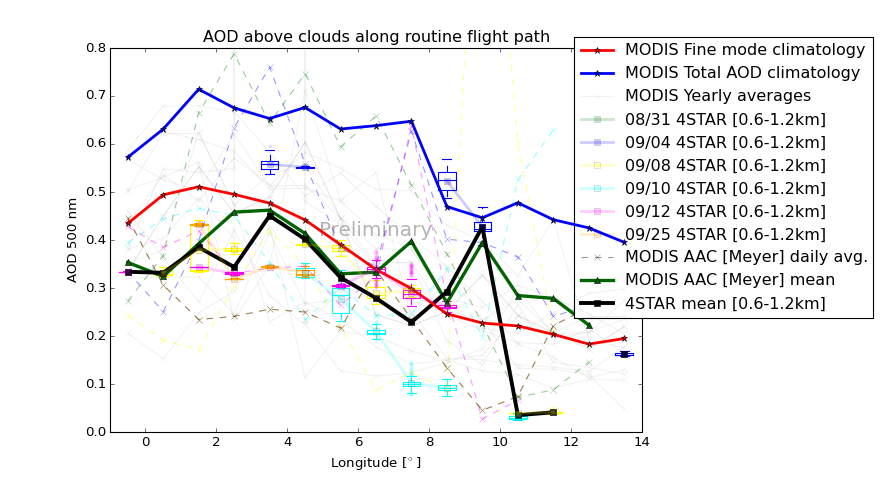

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\numpy\lib\nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [51]:
plt.figure(figsize=(11,6))
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2.5)
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AOD_CLIMOMEAN'].data[0,:],
         '*-',color='b',label='MODIS Total AOD climatology',zorder=51,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above clouds along routine flight path')
means = []

for j,f in enumerate(flr):
    binsf = []
    for i,c in enumerate(lims3[0:-1]):
        lon_fl = (s['Longitude'][f]>=c)&(s['Longitude'][f]<lims3[i+1])
        binsf.append(s['AOD0501'][f][lon_fl])
    #plt.plot(s['Longitude'][f],s['AOD0501'][f],'.',color=cls[j],alpha=0.02)
    bo = plt.boxplot(binsf,0,'.',showmeans=True,positions=pos3)
    color_box(bo,cls[j])
    [plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
    [plt.setp(bo['means'][idx],alpha=0.05)for idx in xrange(len(bo['means']))]
    means.append([a.get_ydata()[0] for a in bo['means']])
    plt.plot(pos3,[a.get_ydata()[0] for a in bo['means']],
             's-',zorder=100,color=cls[j],label='{}/{} 4STAR [0.6-1.2km]'.format(d_rtn[j][4:6],d_rtn[j][6:8]),
             lw=2.5,alpha=0.2)    
    
ac = []
for i,a in enumerate(daac):
    plt.plot(a['BinCenter'][0,:],a['meanAODperbin'][1:,0],'x--',lw=1,color=cls[i],alpha=0.4)
    ac.append(a['meanAODperbin'][1:,0])
plt.plot(a['BinCenter'][0,:],a['meanAODperbin'][1:,0],'x--',lw=1,color='k',alpha=0.4,label='MODIS AAC [Meyer] daily avg.')
plt.plot(a['BinCenter'][0,:],np.nanmean(ac,axis=0),'^-',lw=3,color='darkgreen',label='MODIS AAC [Meyer] mean')
    
plt.plot(pos3,np.nanmean(np.array(means),axis=0),'s-k',lw=3.5,label='4STAR mean [0.6-1.2km]')
plt.text(0.5, 0.5, 'Preliminary',
        verticalalignment='bottom', horizontalalignment='center',
        transform=plt.gca().transAxes,
        color='k', fontsize=18,zorder=1,alpha=0.3)
plt.legend(numpoints=1,frameon=True,bbox_to_anchor=(1.45,1.05))
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.78, box.height])

plt.savefig(fp+'plot\\MODIS_Climatology_vs_AAC_4STAR_and_Meyer_AAC.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


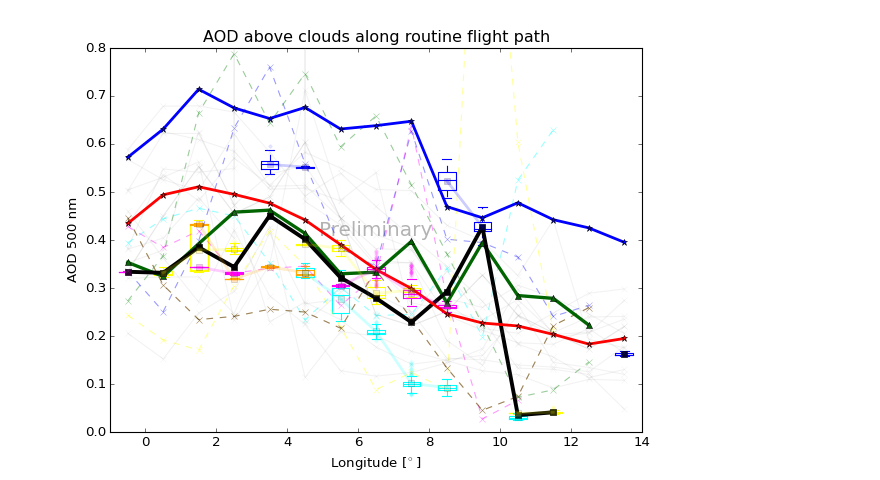

In [52]:
plt.figure(figsize=(11,6))
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2.5)
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AOD_CLIMOMEAN'].data[0,:],
         '*-',color='b',label='MODIS Total AOD climatology',zorder=51,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above clouds along routine flight path')
means = []

for j,f in enumerate(flr):
    binsf = []
    for i,c in enumerate(lims3[0:-1]):
        lon_fl = (s['Longitude'][f]>=c)&(s['Longitude'][f]<lims3[i+1])
        binsf.append(s['AOD0501'][f][lon_fl])
    #plt.plot(s['Longitude'][f],s['AOD0501'][f],'.',color=cls[j],alpha=0.02)
    bo = plt.boxplot(binsf,0,'.',showmeans=True,positions=pos3)
    color_box(bo,cls[j])
    [plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
    [plt.setp(bo['means'][idx],alpha=0.05)for idx in xrange(len(bo['means']))]
    means.append([a.get_ydata()[0] for a in bo['means']])
    plt.plot(pos3,[a.get_ydata()[0] for a in bo['means']],
             's-',zorder=100,color=cls[j],label='{}/{} 4STAR [0.6-1.2km]'.format(d_rtn[j][4:6],d_rtn[j][6:8]),
             lw=2.5,alpha=0.2)    
    
ac = []
for i,a in enumerate(daac):
    plt.plot(a['BinCenter'][0,:],a['meanAODperbin'][1:,0],'x--',lw=1,color=cls[i],alpha=0.4)
    ac.append(a['meanAODperbin'][1:,0])
plt.plot(a['BinCenter'][0,:],a['meanAODperbin'][1:,0],'x--',lw=1,color='k',alpha=0.4,label='MODIS AAC [Meyer] daily avg.')
plt.plot(a['BinCenter'][0,:],np.nanmean(ac,axis=0),'^-',lw=3,color='darkgreen',label='MODIS AAC [Meyer] mean')
    
plt.plot(pos3,np.nanmean(np.array(means),axis=0),'s-k',lw=3.5,label='4STAR mean [0.6-1.2km]')
plt.text(0.5, 0.5, 'Preliminary',
        verticalalignment='bottom', horizontalalignment='center',
        transform=plt.gca().transAxes,
        color='k', fontsize=18,zorder=1,alpha=0.3)
#plt.legend(numpoints=1,frameon=True,bbox_to_anchor=(1.45,1.05))
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.78, box.height])

#plt.savefig(fp+'plot\\MODIS_Climatology_vs_AAC_4STAR_and_Meyer_AAC_noleg.png',transparent=True,dpi=600)

## Plot out the previous plot comparison, but with MODIS AAC per monthly

<IPython.core.display.Javascript object>


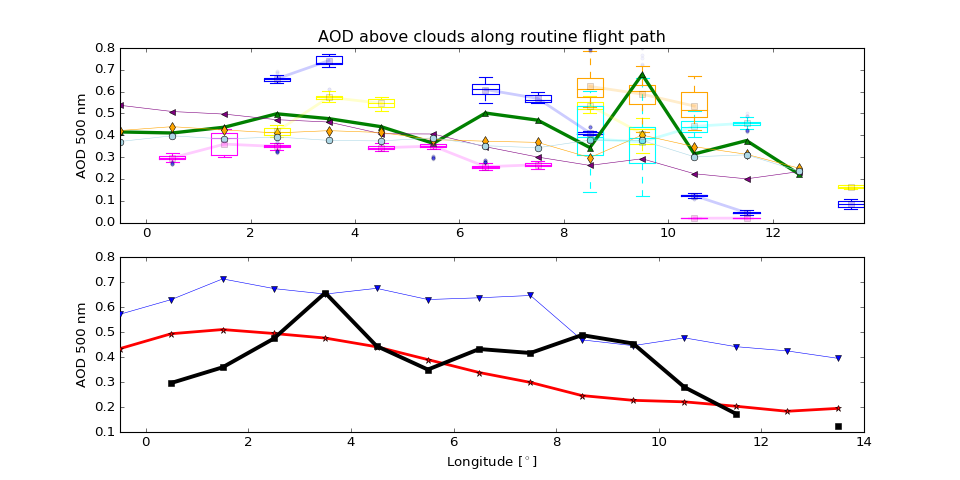

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice


In [72]:
plt.figure(figsize=(12,6))
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine AOD (Sept. 2001-2013)',zorder=50,lw=2.5)
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AOD_CLIMOMEAN'].data[0,:],
         'v-',color='b',label='MODIS Total AOD (Sept. 2001-2013)',zorder=51,lw=0.5)
#plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
#         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
#plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above clouds along routine flight path')
means = []

for j,f in enumerate(flr):
    binsf = []
    for i,c in enumerate(lims3[0:-1]):
        lon_fl = (s['Longitude'][f]>=c)&(s['Longitude'][f]<lims3[i+1])
        binsf.append(s['AOD0501'][f][lon_fl])
    #plt.plot(s['Longitude'][f],s['AOD0501'][f],'.',color=cls[j],alpha=0.02)
    bo = plt.boxplot(binsf,0,'.',showmeans=True,positions=pos3)
    color_box(bo,cls[j])
    [plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
    [plt.setp(bo['means'][idx],alpha=0.05)for idx in xrange(len(bo['means']))]
    means.append([a.get_ydata()[0] for a in bo['means']])
    plt.plot(pos3,[a.get_ydata()[0] for a in bo['means']],
             's-',zorder=100,color=cls[j],label='{}/{} 4STAR {vv} [0.5-1.6km]'.format(d_rtn[j][4:6],d_rtn[j][6:8],vv=vv),
             lw=2.5,alpha=0.2)    
    
ac = []
for i,a in enumerate([daac[j] for j in i_flt]):
#    plt.plot(a['BinCenter'][0,:],a['meanAODperbin'][1:,0],'x--',lw=1,color=cls[i],alpha=0.4)
    ac.append(a['meanAODperbin'][1:,0])
#plt.plot(a['BinCenter'][0,:],a['meanAODperbin'][1:,0],'x--',lw=1,color='k',alpha=0.4,label='MODIS AAC [Meyer] daily avg.')
plt.plot(a['BinCenter'][0,:],np.nanmean(ac,axis=0),'^-',lw=3,color='green',label='MODIS AAC for 2016 routine flights')

ac_aug = []
for i,a in enumerate([daac[j] for j in i_aug]):
    ac_aug.append(a['meanAODperbin'][1:,0])
plt.plot(a['BinCenter'][0,:],np.nanmean(ac_aug,axis=0),'<-',lw=0.5,color='purple',label='MODIS AAC for Aug. 2016')

ac_sep = []
for i,a in enumerate([daac[j] for j in i_sep]):
    ac_sep.append(a['meanAODperbin'][1:,0])
plt.plot(a['BinCenter'][0,:],np.nanmean(ac_sep,axis=0),'d-',lw=0.5,color='orange',label='MODIS AAC for Sept. 2016')

ac_oct = []
for i,a in enumerate([daac[j] for j in i_oct]):
    ac_sep.append(a['meanAODperbin'][1:,0])
plt.plot(a['BinCenter'][0,:],np.nanmean(ac_sep,axis=0),'o-',lw=0.5,color='lightblue',label='MODIS AAC for Oct. 2016')


plt.plot(pos3,np.nanmean(np.array(means),axis=0),'s-k',lw=3.5,zorder=200,label='4STAR {vv} mean [0.5-1.6km]'.format(vv=vv))
#plt.text(0.5, 0.6, 'Preliminary',
#        verticalalignment='bottom', horizontalalignment='center',
#        transform=plt.gca().transAxes,
#        color='k', fontsize=18,zorder=1,alpha=0.4)
plt.legend(numpoints=1,frameon=True,bbox_to_anchor=(1.68,1.05))
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.67, box.height])

plt.savefig(fp+'plot/MODIS_Climatology_vs_AAC_4STAR_{vv}_and_Meyer_AAC_and_monthlyavg.png'.format(vv=vv),transparent=True,dpi=600)

In [63]:
fp

u'/mnt/c/Users/sleblanc/Research/ORACLES/'

# Prepare the split plot for publication

In [ ]:
plt.figure()
plt.plot()

False

<IPython.core.display.Javascript object>


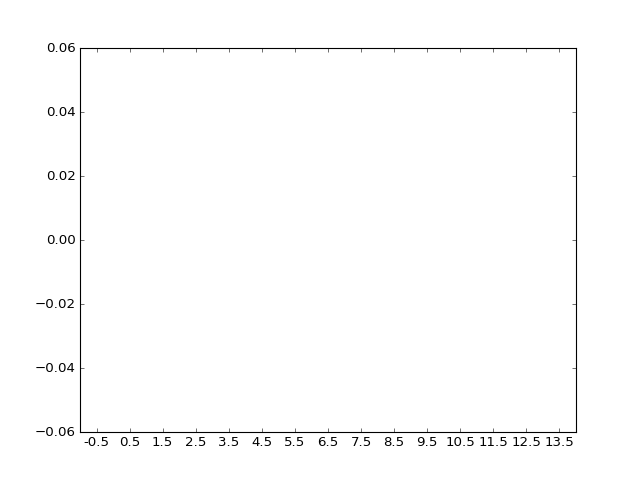

In [108]:
plt.figure()
for j,f in enumerate(flr):
    binsf = []
    for i,c in enumerate(lims3[0:-1]):
        lon_fl = (s['Longitude'][f]>=c)&(s['Longitude'][f]<lims3[i+1])
        binsf.append(s['AOD0501'][f][lon_fl])
    plt.plot(s['Longitude'][f],s['AOD0501'][f],'o',color=cls[j])
    bo = plt.boxplot(binsf,0,'.',showmeans=True,positions=pos3)
    color_box(bo,cls[j])
    [plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
    [plt.setp(bo['fliers'][idx],color=cls[j])for idx in xrange(len(bo['fliers']))]
    [plt.setp(bo['fliers'][idx],marker='.')for idx in xrange(len(bo['fliers']))]
    [plt.setp(bo['means'][idx],alpha=0.05)for idx in xrange(len(bo['means']))]
    means.append([a.get_ydata()[0] for a in bo['means']])
    plt.plot(pos3,[a.get_ydata()[0] for a in bo['means']],
             's',zorder=100,color=cls[j],label='{}/{} 4STAR'.format(d_rtn[j][4:6],d_rtn[j][6:8],vv=vv),
             lw=2.5,alpha=0.2)    
    break

<IPython.core.display.Javascript object>


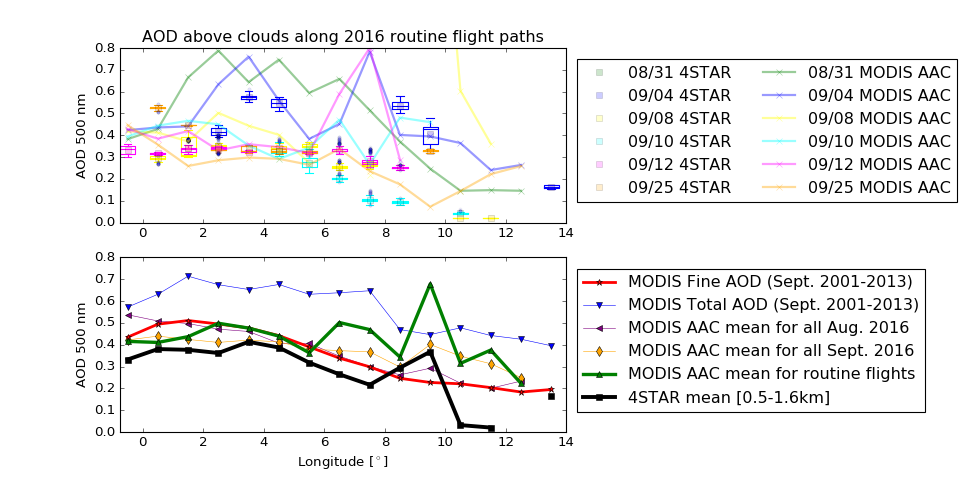

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: Mean of empty slice


In [170]:
plt.figure(figsize=(12,6))

ax = plt.subplot(2,1,1)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)

plt.title('AOD above clouds along 2016 routine flight paths')
means = []

for j,f in enumerate(flr):
    binsf = []
    for i,c in enumerate(lims3[0:-1]):
        lon_fl = (s['Longitude'][f]>=c)&(s['Longitude'][f]<lims3[i+1])
        binsf.append(s['AOD0501'][f][lon_fl])
    #plt.plot(s['Longitude'][f],s['AOD0501'][f],'.',color=cls[j],alpha=0.02)
    bo = plt.boxplot(binsf,0,'.',showmeans=True,positions=pos3)
    color_box(bo,cls[j])
    [plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
    [plt.setp(bo['fliers'][idx],color=cls[j])for idx in xrange(len(bo['fliers']))]
    [plt.setp(bo['fliers'][idx],marker='.')for idx in xrange(len(bo['fliers']))]
    [plt.setp(bo['means'][idx],alpha=0.05)for idx in xrange(len(bo['means']))]
    means.append([a.get_ydata()[0] for a in bo['means']])
    plt.plot(pos3,[a.get_ydata()[0] for a in bo['means']],
             's',zorder=100,color=cls[j],label='{}/{} 4STAR'.format(d_rtn[j][4:6],d_rtn[j][6:8],vv=vv),
             lw=2.5,alpha=0.2)    
    
#plt.plot(pos3,np.nanmean(np.array(means),axis=0),'s-k',lw=3.5,zorder=200,label='4STAR mean')

ac = []
for i,a in enumerate([daac[j] for j in i_flt]):
    plt.plot(a['BinCenter'][0,:],a['meanAODperbin'][1:,0],'x-',lw=2,color=cls[i],alpha=0.4,
             label='{}/{} MODIS AAC'.format(d_rtn[i][4:6],d_rtn[i][6:8]))
    ac.append(a['meanAODperbin'][1:,0])
#plt.plot(a['BinCenter'][0,:],a['meanAODperbin'][1:,0],'x--',lw=1,color='k',alpha=0.4,label='MODIS AAC [Meyer] daily avg.')
#plt.plot(a['BinCenter'][0,:],np.nanmean(ac,axis=0),'^-',lw=3,color='green',label='MODIS AAC mean')

plt.legend(numpoints=1,frameon=True, ncol=2, bbox_to_anchor=(1.005,0.98),loc=2)



ax2 = plt.subplot(2,1,2,sharex=ax)
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine AOD (Sept. 2001-2013)',zorder=50,lw=2.5)
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AOD_CLIMOMEAN'].data[0,:],
         'v-',color='b',label='MODIS Total AOD (Sept. 2001-2013)',zorder=51,lw=0.5)

ac_aug = []
for i,a in enumerate([daac[j] for j in i_aug]):
    ac_aug.append(a['meanAODperbin'][1:,0])
plt.plot(a['BinCenter'][0,:],np.nanmean(ac_aug,axis=0),'<-',lw=0.5,color='purple',label='MODIS AAC mean for all Aug. 2016')
ac_sep = []
for i,a in enumerate([daac[j] for j in i_sep]):
    ac_sep.append(a['meanAODperbin'][1:,0])
plt.plot(a['BinCenter'][0,:],np.nanmean(ac_sep,axis=0),'d-',lw=0.5,color='orange',label='MODIS AAC mean for all Sept. 2016')
#ac_oct = []
#for i,a in enumerate([daac[j] for j in i_oct]):
#    ac_sep.append(a['meanAODperbin'][1:,0])
#plt.plot(a['BinCenter'][0,:],np.nanmean(ac_sep,axis=0),'o-',lw=0.5,color='lightblue',label='MODIS AAC for Oct. 2016')

plt.plot(a['BinCenter'][0,:],np.nanmean(ac,axis=0),'^-',lw=3,color='green',zorder=60,label='MODIS AAC mean for routine flights')

plt.plot(pos3,np.nanmean(np.array(means),axis=0),'s-k',lw=3.5,zorder=200,label='4STAR mean [0.5-1.6km]')
plt.xlabel('Longitude [$^\\circ$]')
plt.ylabel('AOD 500 nm')

plt.legend(numpoints=1,frameon=True, bbox_to_anchor=(1.005,0.98),loc=2)
ti = ax2.set_xticks([0,2,4,6,8,10,12,14])
tl = ax2.set_xticklabels([0,2,4,6,8,10,12,14])

ti = ax.set_xticks([0,2,4,6,8,10,12,14])
tl = ax.set_xticklabels([0,2,4,6,8,10,12,14])

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])
box2 = ax2.get_position()
ax2.set_position([box2.x0, box2.y0, box2.width * 0.6, box2.height])



#plt.savefig(fp+'plot/ORACLES2016_MODIS_Climatology_vs_AAC_4STAR_and_Meyer_AAC_split.png',
#            transparent=True,dpi=600)